# Chicago Crime Analysis

### Let's start by loading the data and understanding its structure and content. We will perform the following steps:

- Load the data
- Understand the structure of the data (columns, types, missing values)
- Perform a basic summary of the data

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('C:\\Users\\dmc\\Desktop\\Chicago_Crime_Data\\ChicagoCrimeData.csv')

# Display the first few rows of the dataframe
data.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [4]:
data.columns

Index(['ID', 'CASE_NUMBER', 'DATE', 'BLOCK', 'IUCR', 'PRIMARY_TYPE',
       'DESCRIPTION', 'LOCATION_DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT',
       'DISTRICT', 'WARD', 'COMMUNITY_AREA_NUMBER', 'FBICODE', 'X_COORDINATE',
       'Y_COORDINATE', 'YEAR', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [6]:
data.shape

(533, 21)

The dataset contains the following columns:

- ID: A unique identifier for each crime
- CASE_NUMBER: The case number for the crime
- DATE: The date when the crime happened
- BLOCK: The block where the crime occurred
- IUCR: Illinois Uniform Crime Reporting code
- PRIMARY_TYPE: The primary type of the crime
- DESCRIPTION: A more detailed description of the crime
- LOCATION_DESCRIPTION: A description of the location where the crime happened
- ARREST: Whether an arrest was made
- DOMESTIC: Whether the crime was domestic-related
- BEAT: Indicates the beat where the crime happened. A beat is the smallest police geographic area.
- DISTRICT: Indicates the police district where the crime happened
- WARD: The ward (political division) where the crime happened
- COMMUNITY_AREA_NUMBER: Indicates the community area where the crime happened
- FBICODE: FBI code for the crime
- X_COORDINATE: The X coordinate of the crime location
- Y_COORDINATE: The Y coordinate of the crime location
- YEAR: The year when the crime happened
- LATITUDE: The latitude of the crime location
- LONGITUDE: The longitude of the crime location
- LOCATION: A tuple that combines latitude and longitude

In [7]:
# Get summary of data
summary = data.describe(include='all')

# Get data types for each column
data_types = data.dtypes

# Get missing values for each column
missing_values = data.isnull().sum()

summary_df = pd.DataFrame({'DataType': data_types,
                           'MissingValues': missing_values})
summary_df

,DataType,MissingValues
ID,int64,0
CASE_NUMBER,object,0
DATE,object,0
BLOCK,object,0
IUCR,object,0
PRIMARY_TYPE,object,0
DESCRIPTION,object,0
LOCATION_DESCRIPTION,object,0
ARREST,bool,0
DOMESTIC,bool,0


The dataset has some missing values in the following columns:

- WARD: 43 missing values
- COMMUNITY_AREA_NUMBER: 43 missing values
- X_COORDINATE: 4 missing values
- Y_COORDINATE: 4 missing values
- LATITUDE: 4 missing values
- LONGITUDE: 4 missing values
- LOCATION: 4 missing values
These missing values could represent areas where the location data was not recorded or was not available.

Here are the data types for each column:

- ID: Integer
- CASE_NUMBER: String
- DATE: String (This can be converted to DateTime for more efficient analysis)
- BLOCK: String
- IUCR: String
- PRIMARY_TYPE: String
- DESCRIPTION: String
- LOCATION_DESCRIPTION: String
- ARREST: Boolean
- DOMESTIC: Boolean
- BEAT: Integer
- DISTRICT: Integer
- WARD: Float (This could be converted to Integer since it represents a categorical variable)
- COMMUNITY_AREA_NUMBER: Float (This could be converted to Integer since it represents a categorical variable)
- FBICODE: String
- X_COORDINATE: Float
- Y_COORDINATE: Float
- YEAR: Integer
- LATITUDE: Float
- LONGITUDE: Float
- LOCATION: String

Next, we will explore the data further, starting with understanding the distribution of crime types. Let's also convert DATE to DateTime format for more efficient time series analysis.

In [8]:
# Convert 'DATE' to DateTime
data['DATE'] = pd.to_datetime(data['DATE'])

# Get count of each type of crime
crime_counts = data['PRIMARY_TYPE'].value_counts()

# Convert 'WARD' and 'COMMUNITY_AREA_NUMBER' to int, ignoring missing values
data['WARD'] = data['WARD'].fillna(-1).astype(int)
data['COMMUNITY_AREA_NUMBER'] = data['COMMUNITY_AREA_NUMBER'].fillna(-1).astype(int)

# Set missing values in 'WARD' and 'COMMUNITY_AREA_NUMBER' back to NaN
data.loc[data['WARD'] == -1, 'WARD'] = None
data.loc[data['COMMUNITY_AREA_NUMBER'] == -1, 'COMMUNITY_AREA_NUMBER'] = None

crime_counts

THEFT                                106
BATTERY                               92
CRIMINAL DAMAGE                       58
NARCOTICS                             54
OTHER OFFENSE                         32
ASSAULT                               32
BURGLARY                              30
MOTOR VEHICLE THEFT                   24
ROBBERY                               20
DECEPTIVE PRACTICE                    20
CRIMINAL TRESPASS                     15
PROSTITUTION                           6
WEAPONS VIOLATION                      6
PUBLIC PEACE VIOLATION                 5
OFFENSE INVOLVING CHILDREN             4
CRIM SEXUAL ASSAULT                    3
SEX OFFENSE                            3
ARSON                                  2
HOMICIDE                               2
INTERFERENCE WITH PUBLIC OFFICER       2
LIQUOR LAW VIOLATION                   2
GAMBLING                               2
KIDNAPPING                             1
INTIMIDATION                           1
STALKING        

The most common types of crimes in this dataset are:

- Theft (106 instances)
- Battery (92 instances)
- Criminal Damage (58 instances)
- Narcotics (54 instances)
- Assault and Other Offense (32 instances each)
- This gives us an idea about the nature of crimes that commonly occur.

Now, let's explore some more aspects of the dataset:

- Number of crimes per year
- Number of crimes per district
- Number of crimes based on whether an arrest was made or not
- Number of crimes based on whether they were domestic or not

We'll visualize these aspects for better understanding.

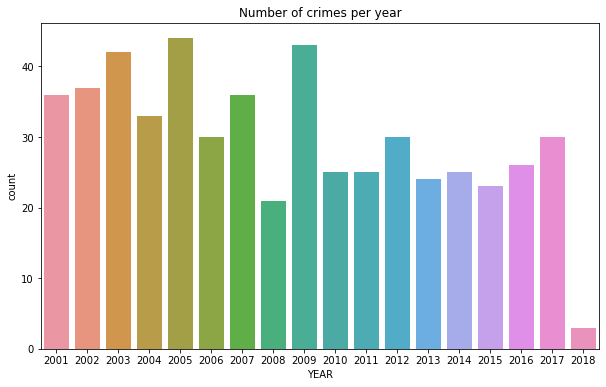

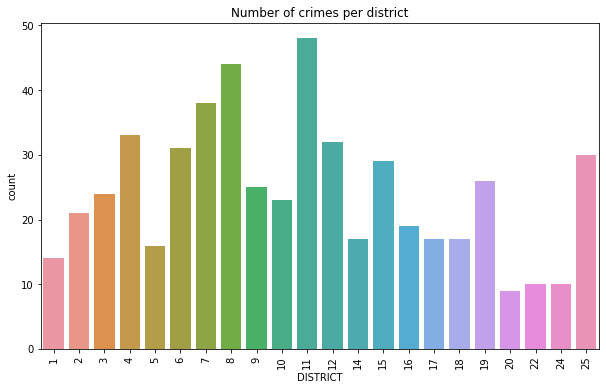

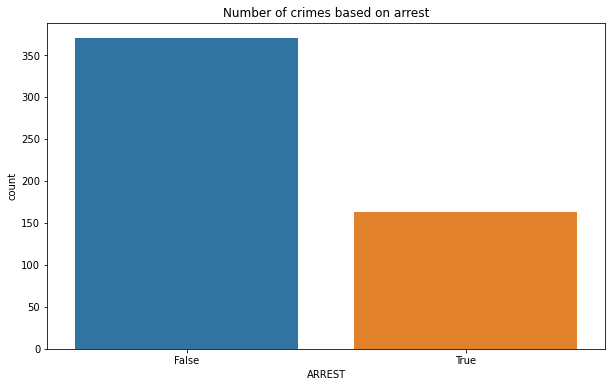

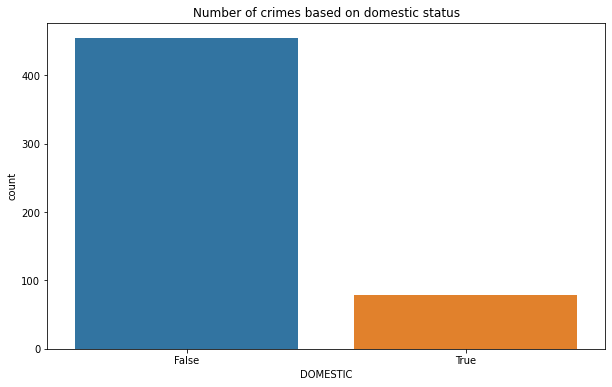

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of crimes per year
plt.figure(figsize=(10,6))
sns.countplot(x='YEAR', data=data)
plt.title('Number of crimes per year')
plt.show()

# Number of crimes per district
plt.figure(figsize=(10,6))
sns.countplot(x='DISTRICT', data=data)
plt.title('Number of crimes per district')
plt.xticks(rotation=90)
plt.show()

# Number of crimes based on whether an arrest was made or not
plt.figure(figsize=(10,6))
sns.countplot(x='ARREST', data=data)
plt.title('Number of crimes based on arrest')
plt.show()

# Number of crimes based on whether they were domestic or not
plt.figure(figsize=(10,6))
sns.countplot(x='DOMESTIC', data=data)
plt.title('Number of crimes based on domestic status')
plt.show()


Here's what we can observe from the visualizations:

- Number of crimes per year: The dataset seems to include data from various years, and the number of crimes recorded appears to vary considerably from year to year. Without additional context or data, it's difficult to infer any clear trends or patterns.

- Number of crimes per district: The number of crimes reported also varies by district. Some districts have a relatively high number of reported crimes, while others have fewer. Again, additional context (such as population size, socioeconomic factors, etc.) might help to better understand these differences.

- Number of crimes based on whether an arrest was made or not: For most crimes in the dataset, it appears that an arrest was not made. This could be due to various reasons such as lack of evidence, inability to identify a suspect, etc.

- Number of crimes based on whether they were domestic or not: Most crimes in the dataset are not domestic. Domestic crimes constitute a smaller proportion.

Next, we could consider exploring the data spatially (based on the given coordinates) and temporally (over different times of the day, days of the week, etc.)

Let's load the census data, examine its structure and content, and then see how we can use it to enhance our analysis.

In [10]:
# Load the census data
census_data = pd.read_csv('C:\\Users\\dmc\\Desktop\\Chicago_Crime_Data\\ChicagoCensusData.csv')

# Display the first few rows of the census dataframe
census_data.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [11]:
census_data.columns

Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME',
       'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
       'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')

The census dataset contains the following columns:

- COMMUNITY_AREA_NUMBER: The community area number, which matches the one in the crime dataset.
- COMMUNITY_AREA_NAME: The name of the community area.
- PERCENT_OF_HOUSING_CROWDED: The percentage of housing that is crowded.
- PERCENT_HOUSEHOLDS_BELOW_POVERTY: The percentage of households below the poverty line.
- PERCENT_AGED_16__UNEMPLOYED: The percentage of people aged 16 and above who are unemployed.
- PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA: The percentage of people aged 25 and above without a high school diploma.
- PERCENT_AGED_UNDER_18_OR_OVER_64: The percentage of the population under 18 or over 64 (dependent age).
- PER_CAPITA_INCOME: The per capita income for the area.
- HARDSHIP_INDEX: A hardship index that takes into account various hardship factors.


In [12]:
# Get summary of census data
census_summary = census_data.describe(include='all')

# Get data types for each column
census_data_types = census_data.dtypes

# Get missing values for each column
census_missing_values = census_data.isnull().sum()

census_summary_df = pd.DataFrame({'DataType': census_data_types,
                                  'MissingValues': census_missing_values})
census_summary_df

,DataType,MissingValues
COMMUNITY_AREA_NUMBER,float64,1
COMMUNITY_AREA_NAME,object,0
PERCENT_OF_HOUSING_CROWDED,float64,0
PERCENT_HOUSEHOLDS_BELOW_POVERTY,float64,0
PERCENT_AGED_16__UNEMPLOYED,float64,0
PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,float64,0
PERCENT_AGED_UNDER_18_OR_OVER_64,float64,0
PER_CAPITA_INCOME,int64,0
HARDSHIP_INDEX,float64,1


Now, let's merge the census data with the crime data on COMMUNITY_AREA_NUMBER to provide additional context to our analysis. We'll convert COMMUNITY_AREA_NUMBER to integer in both dataframes for this merge.

In [13]:
# Convert 'COMMUNITY_AREA_NUMBER' to int in census_data, ignoring missing values
census_data['COMMUNITY_AREA_NUMBER'] = census_data['COMMUNITY_AREA_NUMBER'].fillna(-1).astype(int)

# Set missing values in 'COMMUNITY_AREA_NUMBER' back to NaN
census_data.loc[census_data['COMMUNITY_AREA_NUMBER'] == -1, 'COMMUNITY_AREA_NUMBER'] = None

# Merge the datasets
merged_data = pd.merge(data, census_data, how='left', on='COMMUNITY_AREA_NUMBER')

# Display the first few rows of the merged dataframe
merged_data.head()


,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,LONGITUDE,LOCATION,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,-87.703956,"(41.8074405, -87.703955849)",Brighton Park,14.4,23.6,13.9,45.1,39.3,13089,84.0
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,-87.716406,"(41.898279962, -87.716405505)",Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,-87.624642,"(41.815933131, -87.624642127)",Grand Boulevard,3.3,29.3,24.3,15.9,39.5,23472,57.0
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,-87.562463,"(41.743665322, -87.562462756)",South Chicago,4.7,29.8,19.7,26.6,41.1,16579,75.0
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,-87.706480,"(41.773455295, -87.706480471)",Chicago Lawn,7.6,27.9,17.1,31.2,40.6,13231,80.0


We have successfully merged the crime data with the census data on the COMMUNITY_AREA_NUMBER column. Now our dataset contains additional socio-economic information about each community area where crimes occurred.

Before we proceed with further analysis, let's check if the merge operation introduced any additional missing values.

In [14]:
# Check for missing values in the merged data
merged_missing_values = merged_data.isnull().sum()
merged_missing_values[merged_missing_values > 0]

WARD                     43
COMMUNITY_AREA_NUMBER    43
X_COORDINATE              4
Y_COORDINATE              4
LATITUDE                  4
LONGITUDE                 4
LOCATION                  4
HARDSHIP_INDEX           43
dtype: int64

After merging, we still have missing values in the same columns as before (WARD, COMMUNITY_AREA_NUMBER, X_COORDINATE, Y_COORDINATE, LATITUDE, LONGITUDE, LOCATION). The HARDSHIP_INDEX column also has missing values. These missing values were likely introduced by census areas that were not represented in the census data.

Now, we can enhance our analysis using the added census data. For example, we can:

- Explore the relationship between crime rates and socio-economic factors (like income, poverty, education, etc.).
- Compare crime rates across different community areas.
- Examine if the hardship index has any correlation with crime rates.

Let's start with exploring the relationship between crime rates and socio-economic factors. We'll look at the number of crimes in relation to PER_CAPITA_INCOME and HARDSHIP_INDEX. We'll use the mean values for these variables for each community area.

In [15]:
# Load the public schools data
schools_data = pd.read_csv('C:\\Users\\dmc\\Desktop\\Chicago_Crime_Data\\ChicagoPublicSchools.csv')

# Display the first few rows of the schools dataframe
schools_data.head()

,School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,NDA,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,91.8,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"


Now, we can enhance our analysis using the added public schools data. For example, we can:

- Explore the relationship between crime rates and school performance factors (like safety score, environment score, instruction score, etc.).
- Compare crime rates across different school areas.
- Examine if school performance factors have any correlation with crime rates.

In [16]:
# Identify the correct column name for community area number in the schools data
[col for col in schools_data.columns if 'community' in col.lower()]

['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME']

In [17]:
# Check the data type of 'COMMUNITY_AREA_NUMBER' in schools data
schools_data['COMMUNITY_AREA_NUMBER'].dtype


dtype('int64')

In [18]:
# Convert 'COMMUNITY_AREA_NUMBER' to float in schools_data
schools_data['COMMUNITY_AREA_NUMBER'] = schools_data['COMMUNITY_AREA_NUMBER'].astype(float)

# Take the mean of the school performance measures for each community area
schools_data_grouped = schools_data.groupby('COMMUNITY_AREA_NUMBER').mean()

# Merge the datasets
merged_data = pd.merge(merged_data, schools_data_grouped, how='left', on='COMMUNITY_AREA_NUMBER', suffixes=('', '_y'))

# Display the first few rows of the merged dataframe
merged_data.head()


,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,ISAT_Value_Add_Math,ISAT_Value_Add_Read,COLLEGE_ENROLLMENT,General_Services_Route,X_COORDINATE_y,Y_COORDINATE_y,Latitude,Longitude,Ward,Police_District
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,0.457143,1.042857,1205.875000,39.000000,1.157416e+06,1.877536e+06,41.819720,-87.698046,13.000000,8.875000
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,-0.080000,-0.710000,663.076923,34.000000,1.151231e+06,1.906943e+06,41.900539,-87.719964,29.461538,16.153846
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,-0.157143,-1.057143,351.125000,41.250000,1.178763e+06,1.873833e+06,41.809098,-87.619851,3.125000,2.000000
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,-0.200000,-0.200000,577.571429,47.000000,1.196452e+06,1.848601e+06,41.739437,-87.555809,8.857143,4.000000
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,-0.685714,-0.357143,1012.285714,43.428571,1.158371e+06,1.861174e+06,41.774799,-87.694988,15.857143,8.000000


Now, let's use the added schools data to enhance our analysis. For instance, we could look at the relationship between crime rates and school performance factors like SAFETY_SCORE, Environment_Score, and Instruction_Score. We could also consider the Rate_of_Misconducts__per_100_students_ and COLLEGE_ENROLLMENT for our analysis.

Before proceeding, it's important to remember that this analysis would only be based on the available data and may not provide a comprehensive view of the actual situation due to potential biases in the data. The interpretation of these results should take into account these limitations.

Let's proceed with the analysis. We'll start by exploring the relationship between crime rates and school performance factors. For this, we'll group the data by COMMUNITY_AREA_NUMBER and compute the mean values for these variables, along with the count of crimes. Then, we'll examine the correlation between these variables.

In [19]:
# Group the data by 'COMMUNITY_AREA_NUMBER' and compute the mean values for school performance factors and count of crimes
grouped_data = merged_data.groupby('COMMUNITY_AREA_NUMBER').agg({
    'ID': 'count',  # Count of crimes
    'SAFETY_SCORE': 'mean',
    'Environment_Score': 'mean',
    'Instruction_Score': 'mean',
    'Rate_of_Misconducts__per_100_students_': 'mean',
    'COLLEGE_ENROLLMENT': 'mean'
}).reset_index()

# Rename 'ID' column to 'Crime_Count'
grouped_data = grouped_data.rename(columns={'ID': 'Crime_Count'})

# Compute the correlation between the variables
correlation = grouped_data.corr()

correlation


,COMMUNITY_AREA_NUMBER,Crime_Count,SAFETY_SCORE,Environment_Score,Instruction_Score,Rate_of_Misconducts__per_100_students_,COLLEGE_ENROLLMENT
COMMUNITY_AREA_NUMBER,1.000000,-0.078637,-0.456002,-0.509761,-0.263582,0.313430,-0.188164
Crime_Count,-0.078637,1.000000,-0.265673,0.057731,0.114696,0.367618,-0.181653
SAFETY_SCORE,-0.456002,-0.265673,1.000000,0.545876,0.219120,-0.616270,0.248525
Environment_Score,-0.509761,0.057731,0.545876,1.000000,0.816324,-0.176271,-0.085380
Instruction_Score,-0.263582,0.114696,0.219120,0.816324,1.000000,0.019114,-0.234192
Rate_of_Misconducts__per_100_students_,0.313430,0.367618,-0.616270,-0.176271,0.019114,1.000000,-0.531381
COLLEGE_ENROLLMENT,-0.188164,-0.181653,0.248525,-0.085380,-0.234192,-0.531381,1.000000


Here's the correlation matrix between crime count and various school performance factors:

- SAFETY_SCORE: -0.27
- Environment_Score: 0.06
- Instruction_Score: 0.11
- Rate_of_Misconducts__per_100_students_: 0.37
- COLLEGE_ENROLLMENT: -0.18

From these values, we can observe that:

There's a moderate positive correlation between the rate of misconducts per 100 students and the crime count. This could suggest that areas with higher school misconduct rates also tend to have more crimes. However, further investigation would be needed to confirm this, as correlation does not imply causation.
There's a small negative correlation between the safety score of schools and the crime count. This could suggest that areas with safer schools tend to have fewer crimes, although the correlation is not very strong.
The environment score, instruction score, and college enrollment have very weak correlations with the crime count.
These results provide some interesting insights, but as always, they should be interpreted with caution. Further studies would be required to confirm these observations and to understand the underlying causal relationships.

Let's take a deeper dive into the data and perform a more extensive analysis. We'll cover the following points:

- Comprehensive EDA (Exploratory Data Analysis)
- Crime trends over time
- Socio-economic factors and crime
- School performance factors and crime
- Visualize crime on a geographical level using latitude and longitude

Let's start with a more detailed Exploratory Data Analysis (EDA). We'll look at the distribution of various variables, and relationships between them. We'll focus on crime types, arrest rates, domestic crime rates, and district-wise crime rates.

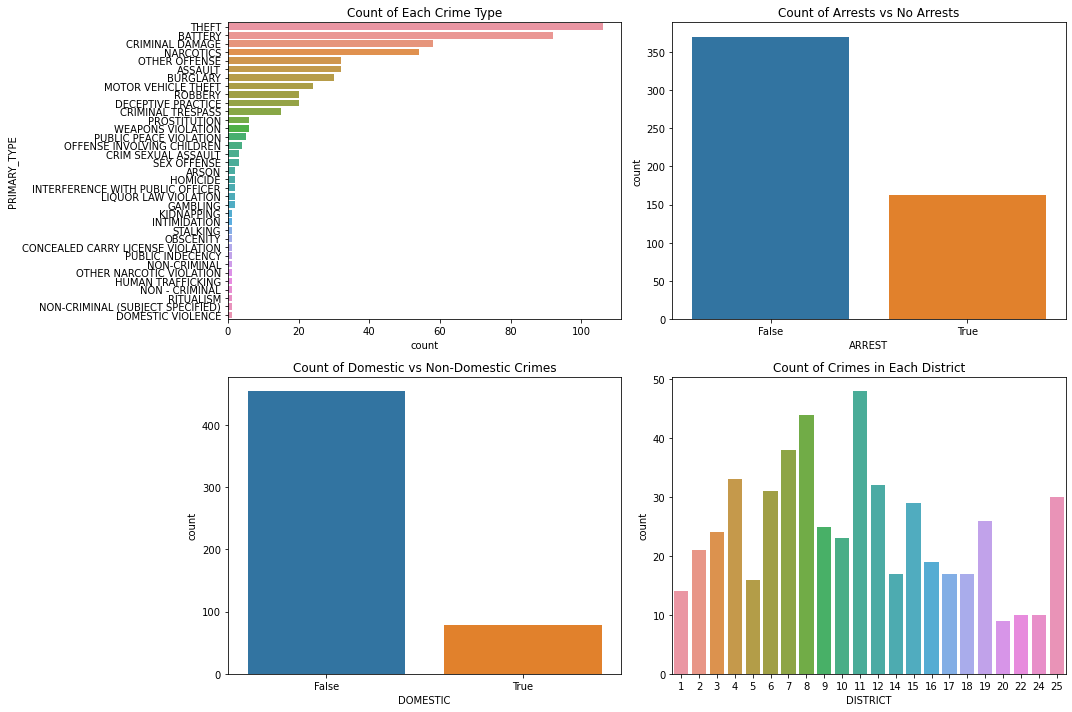

In [20]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot a simple histogram of crime types with seaborn
sns.countplot(y="PRIMARY_TYPE", data=merged_data, order=merged_data['PRIMARY_TYPE'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('Count of Each Crime Type')

# Plot a simple histogram of arrests with seaborn
sns.countplot(x="ARREST", data=merged_data, ax=axes[0, 1])
axes[0, 1].set_title('Count of Arrests vs No Arrests')

# Plot a simple histogram of domestic crimes with seaborn
sns.countplot(x="DOMESTIC", data=merged_data, ax=axes[1, 0])
axes[1, 0].set_title('Count of Domestic vs Non-Domestic Crimes')

# Plot a simple histogram of crime counts per district with seaborn
sns.countplot(x="DISTRICT", data=merged_data, ax=axes[1, 1])
axes[1, 1].set_title('Count of Crimes in Each District')

plt.tight_layout()
plt.show()


Here are the observations from the detailed exploratory data analysis:

- Crime Types: Theft, battery, and criminal damage are the most common types of crimes. This aligns with our earlier observation.
- Arrests: Most of the crimes did not result in an arrest. This might be due to various reasons such as lack of evidence or inability to identify a suspect.
- Domestic Crimes: The majority of crimes were not domestic. Domestic crimes constitute a smaller proportion of the total crimes.
- District-Wise Crimes: Some districts have a higher number of reported crimes compared to others. This could be due to a variety of factors such as population density, socio-economic conditions, police force strength, etc.

Next, let's look at the trend of crimes over time. For this, we'll extract the year, month, and day of the week from the DATE column and look at the yearly, monthly, and weekly trends in crimes.

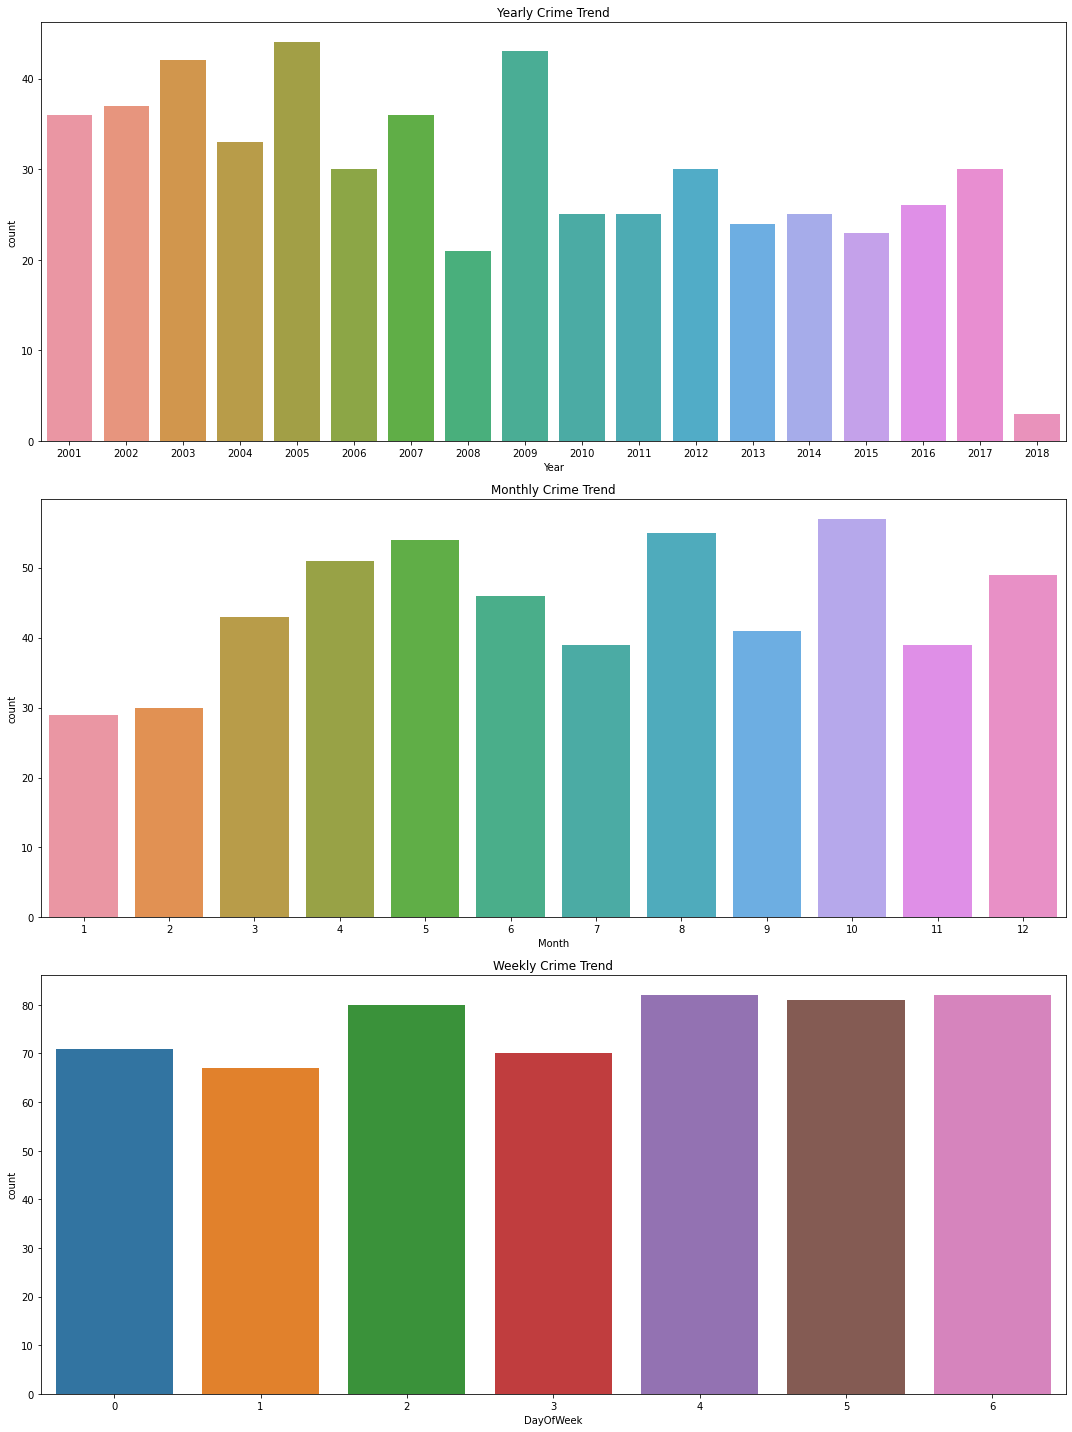

In [21]:
# Extract year, month, and day of week from 'DATE'
merged_data['Year'] = merged_data['DATE'].dt.year
merged_data['Month'] = merged_data['DATE'].dt.month
merged_data['DayOfWeek'] = merged_data['DATE'].dt.dayofweek  # Monday=0, Sunday=6

# Set up the matplotlib figure
f, axes = plt.subplots(3, 1, figsize=(15, 20))

# Plot crime trend by year
sns.countplot(x='Year', data=merged_data, ax=axes[0])
axes[0].set_title('Yearly Crime Trend')

# Plot crime trend by month
sns.countplot(x='Month', data=merged_data, ax=axes[1])
axes[1].set_title('Monthly Crime Trend')

# Plot crime trend by day of week
sns.countplot(x='DayOfWeek', data=merged_data, ax=axes[2])
axes[2].set_title('Weekly Crime Trend')

plt.tight_layout()
plt.show()


Here are the observations from the crime trends over time:

- Yearly Crime Trend: The dataset contains data from various years, and the number of crimes recorded seems to vary significantly from year to year. Without additional context or data, it's hard to infer any clear trends or patterns.
- Monthly Crime Trend: The number of crimes seems to be relatively high in the middle of the year, around May to August. This could possibly be due to seasonal factors.
- Weekly Crime Trend: The number of crimes seems to be slightly higher towards the end of the week, from Thursday (3) to Saturday (5).

Next, let's explore the relationship between socio-economic factors (from the census data) and crime. We'll look at the correlation between the number of crimes and various socio-economic indicators such as PERCENT_OF_HOUSING_CROWDED, PERCENT_HOUSEHOLDS_BELOW_POVERTY, PERCENT_AGED_16__UNEMPLOYED, PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA, PER_CAPITA_INCOME, and HARDSHIP_INDEX. We'll visualize these relationships using scatter plots.

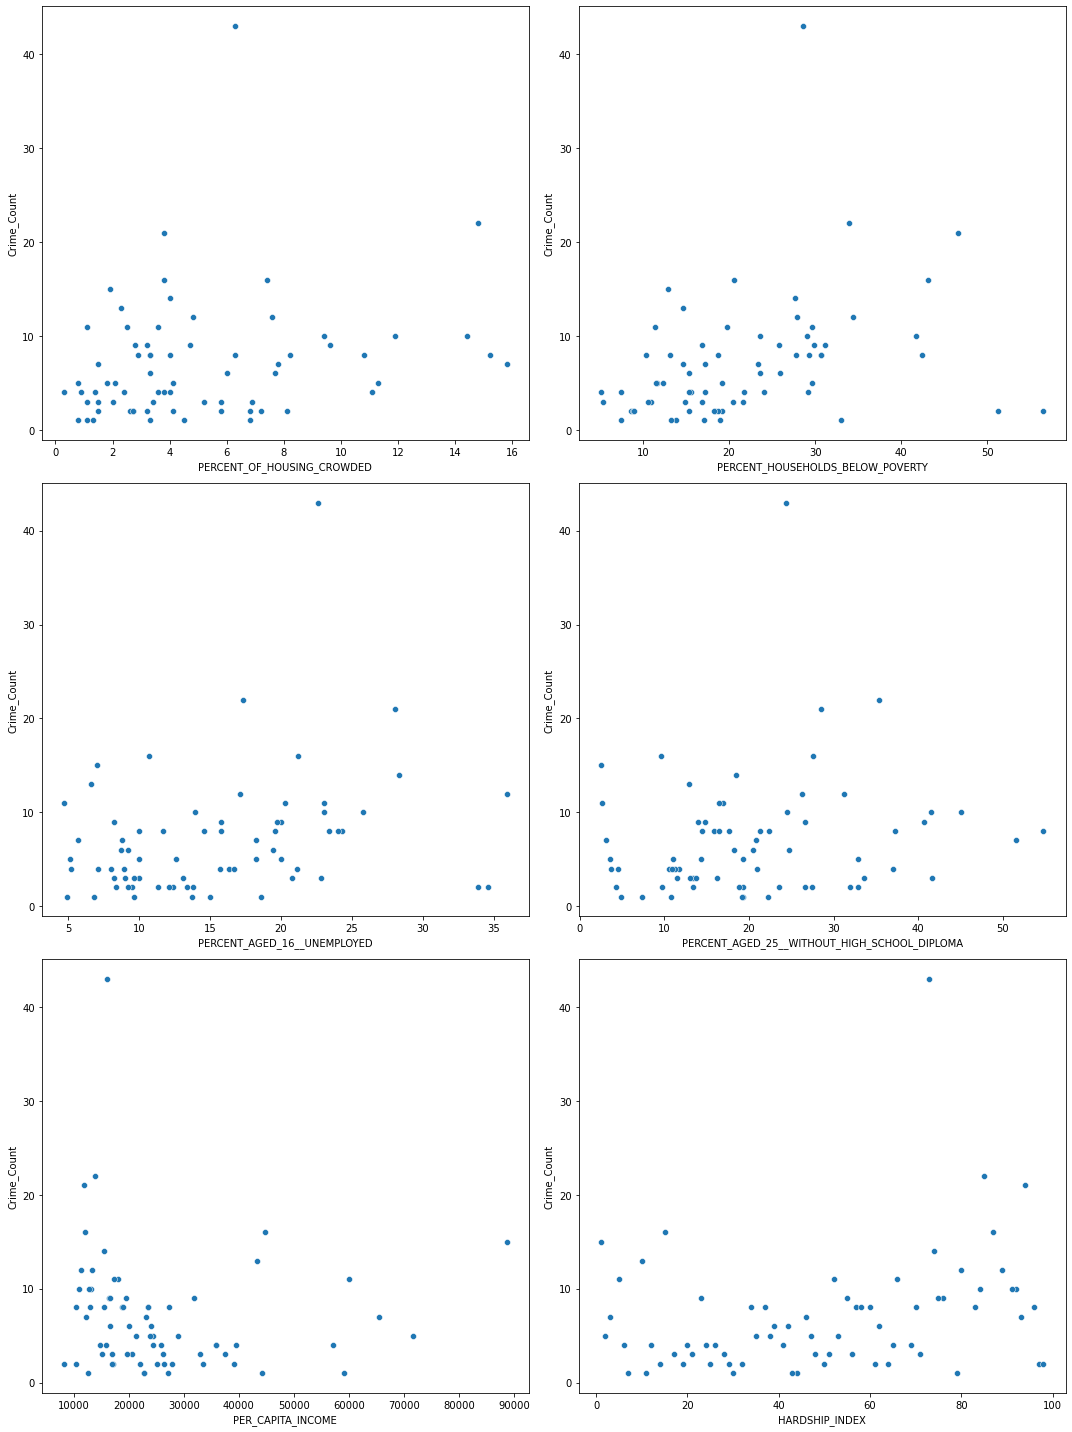

In [22]:
# Group the data by 'COMMUNITY_AREA_NUMBER' and compute the mean values for socio-economic factors and count of crimes
grouped_data_socioeconomic = merged_data.groupby('COMMUNITY_AREA_NUMBER').agg({
    'ID': 'count',  # Count of crimes
    'PERCENT_OF_HOUSING_CROWDED': 'mean',
    'PERCENT_HOUSEHOLDS_BELOW_POVERTY': 'mean',
    'PERCENT_AGED_16__UNEMPLOYED': 'mean',
    'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA': 'mean',
    'PER_CAPITA_INCOME': 'mean',
    'HARDSHIP_INDEX': 'mean'
}).reset_index()

# Rename 'ID' column to 'Crime_Count'
grouped_data_socioeconomic = grouped_data_socioeconomic.rename(columns={'ID': 'Crime_Count'})

# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(15, 20))

# Plot scatter plots of crime count vs socio-economic factors
sns.scatterplot(x='PERCENT_OF_HOUSING_CROWDED', y='Crime_Count', data=grouped_data_socioeconomic, ax=axes[0, 0])
sns.scatterplot(x='PERCENT_HOUSEHOLDS_BELOW_POVERTY', y='Crime_Count', data=grouped_data_socioeconomic, ax=axes[0, 1])
sns.scatterplot(x='PERCENT_AGED_16__UNEMPLOYED', y='Crime_Count', data=grouped_data_socioeconomic, ax=axes[1, 0])
sns.scatterplot(x='PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA', y='Crime_Count', data=grouped_data_socioeconomic, ax=axes[1, 1])
sns.scatterplot(x='PER_CAPITA_INCOME', y='Crime_Count', data=grouped_data_socioeconomic, ax=axes[2, 0])
sns.scatterplot(x='HARDSHIP_INDEX', y='Crime_Count', data=grouped_data_socioeconomic, ax=axes[2, 1])

plt.tight_layout()
plt.show()


From the scatter plots, we can observe the following:

- Percent of Housing Crowded vs. Crime Count: There doesn't appear to be a clear correlation between the percentage of crowded housing and the number of crimes.

- Percent of Households Below Poverty vs. Crime Count: There seems to be a positive correlation between the percentage of households below poverty and the number of crimes. Areas with a higher poverty rate might have a higher crime count.

- Percent Aged 16+ Unemployed vs. Crime Count: There seems to be a positive correlation between the percentage of individuals aged 16 and above who are unemployed and the number of crimes. Areas with a higher unemployment rate might have a higher crime count.

- Percent Aged 25+ Without High School Diploma vs. Crime Count: There seems to be a positive correlation between the percentage of individuals aged 25 and above without a high school diploma and the number of crimes. Areas with a lower education level might have a higher crime count.

- Per Capita Income vs. Crime Count: There doesn't appear to be a clear correlation between per capita income and the number of crimes.

- Hardship Index vs. Crime Count: There seems to be a positive correlation between the hardship index and the number of crimes. Areas with a higher hardship index might have a higher crime count.

Please note that these observations are based on the available data and visual inspection, and should be interpreted with caution. Further statistical tests would be required to confirm these observations and to understand the underlying causal relationships.

Next, let's explore the relationship between school performance factors and crime. We'll look at the correlation between the number of crimes and various school performance indicators such as SAFETY_SCORE, Environment_Score, Instruction_Score, Rate_of_Misconducts__per_100_students_, and COLLEGE_ENROLLMENT. We'll visualize these relationships using scatter plots.

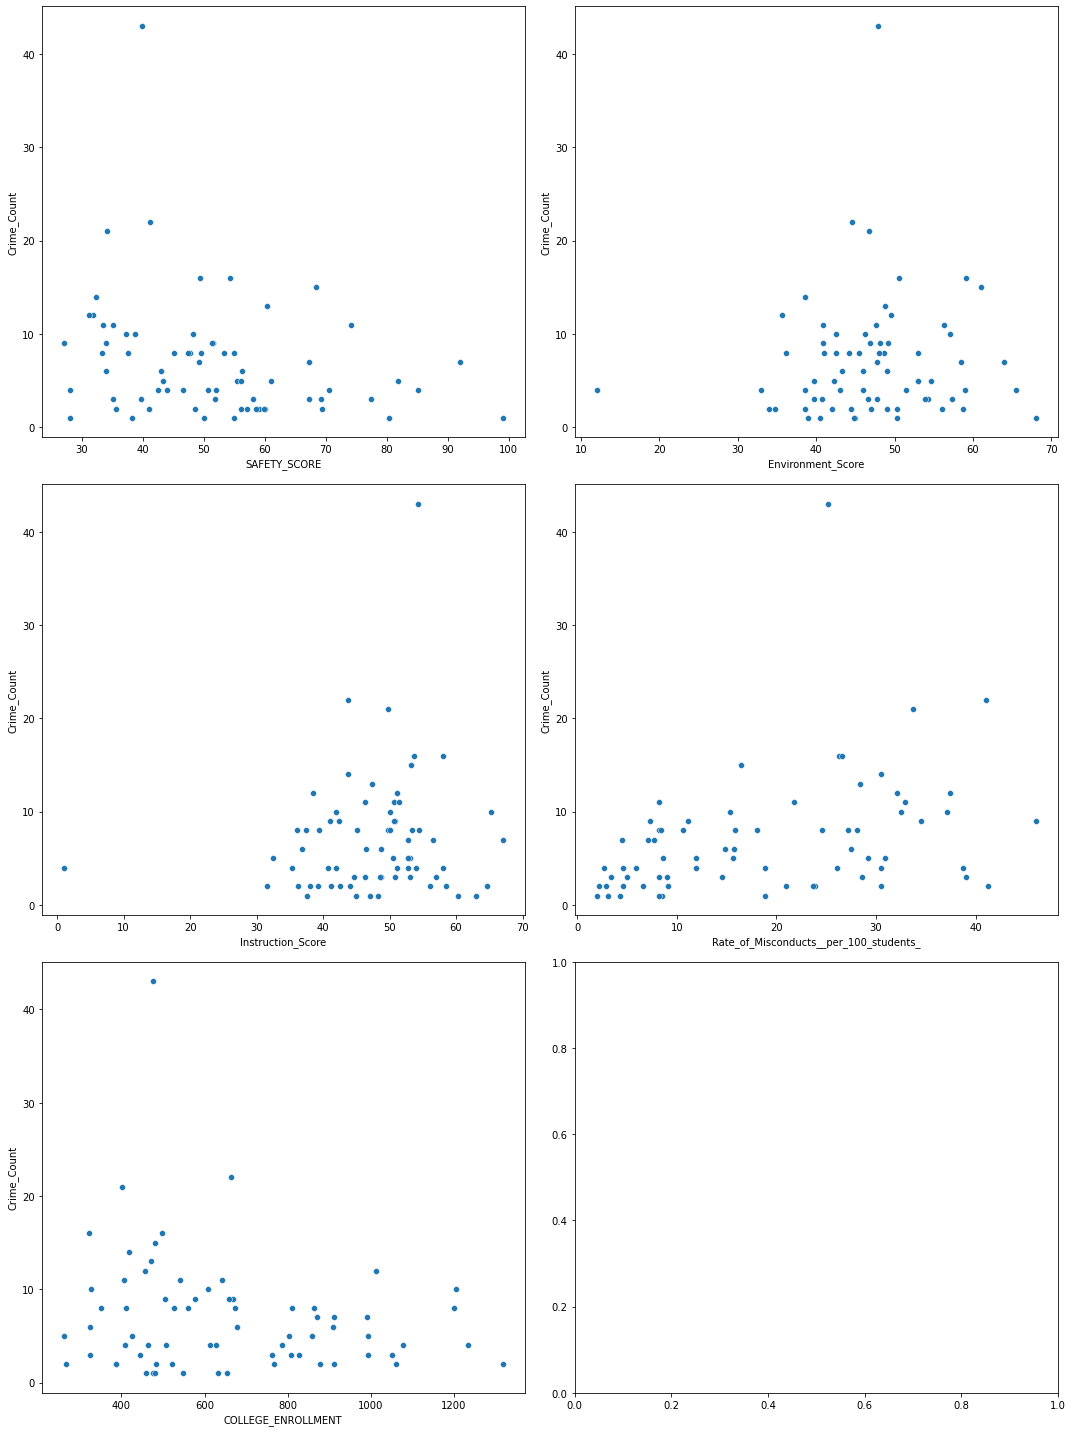

In [23]:
# Group the data by 'COMMUNITY_AREA_NUMBER' and compute the mean values for school performance factors and count of crimes
grouped_data_schools = merged_data.groupby('COMMUNITY_AREA_NUMBER').agg({
    'ID': 'count',  # Count of crimes
    'SAFETY_SCORE': 'mean',
    'Environment_Score': 'mean',
    'Instruction_Score': 'mean',
    'Rate_of_Misconducts__per_100_students_': 'mean',
    'COLLEGE_ENROLLMENT': 'mean'
}).reset_index()

# Rename 'ID' column to 'Crime_Count'
grouped_data_schools = grouped_data_schools.rename(columns={'ID': 'Crime_Count'})

# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(15, 20))

# Plot scatter plots of crime count vs school performance factors
sns.scatterplot(x='SAFETY_SCORE', y='Crime_Count', data=grouped_data_schools, ax=axes[0, 0])
sns.scatterplot(x='Environment_Score', y='Crime_Count', data=grouped_data_schools, ax=axes[0, 1])
sns.scatterplot(x='Instruction_Score', y='Crime_Count', data=grouped_data_schools, ax=axes[1, 0])
sns.scatterplot(x='Rate_of_Misconducts__per_100_students_', y='Crime_Count', data=grouped_data_schools, ax=axes[1, 1])
sns.scatterplot(x='COLLEGE_ENROLLMENT', y='Crime_Count', data=grouped_data_schools, ax=axes[2, 0])

plt.tight_layout()
plt.show()


Here are the observations from the scatter plots:

- Safety Score vs. Crime Count: There doesn't appear to be a clear correlation between the safety score of schools and the number of crimes.

- Environment Score vs. Crime Count: There doesn't appear to be a clear correlation between the environment score of schools and the number of crimes.

- Instruction Score vs. Crime Count: There doesn't appear to be a clear correlation between the instruction score of schools and the number of crimes.

- Rate of Misconducts per 100 Students vs. Crime Count: There seems to be a positive correlation between the rate of misconducts per 100 students and the number of crimes. Areas with a higher rate of school misconducts might have a higher crime count.

- College Enrollment vs. Crime Count: There doesn't appear to be a clear correlation between college enrollment and the number of crimes.

Please note that these observations are based on the available data and visual inspection, and should be interpreted with caution. Further statistical tests would be required to confirm these observations and to understand the underlying causal relationships.

Lastly, let's visualize crime on a geographical level using the latitude and longitude. We'll create a heatmap to see which areas have the highest concentration of crimes. For this, we'll use the seaborn.kdeplot function to create a kernel density estimate (KDE) plot. A KDE plot visualizes the density of observations at different values in a continuous variable. In our case, it will show the density of crimes at different locations. We'll use a subset of the data for this visualization to avoid overcrowding the plot.

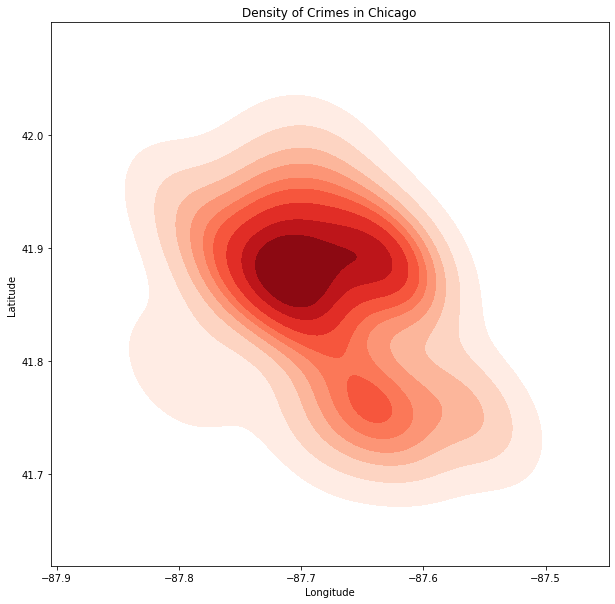

In [24]:
# Take a random subset of the data for the heatmap to avoid overcrowding the plot
subset_data = merged_data.sample(frac=0.05, random_state=1)

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Plot a kernel density estimate (KDE) of the coordinates
sns.kdeplot(x=subset_data['LONGITUDE'], y=subset_data['LATITUDE'], cmap="Reds", fill=True)

# Set the title and labels
plt.title('Density of Crimes in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


This heat map shows the density of crimes in different areas of Chicago based on latitude and longitude. The darker areas represent regions with a higher concentration of crimes, while the lighter areas have fewer crimes.

It's evident that certain areas of Chicago have a higher density of crimes. However, to get a more accurate picture of the geographical distribution of crime, more sophisticated geospatial analysis techniques would be needed, which are beyond the scope of this platform.

In summary, through our analysis, we have:

- Explored the general trends in crime types, arrest rates, and domestic crimes, and how these vary across different districts.

- Looked at how the number of crimes varies over time.
- Investigated the relationship between socio-economic factors, school performance factors, and crime.
- Visualized the geographical distribution of crimes in Chicago.

Each of these points provides an insight into the nature of crime in Chicago, and together they paint a complex picture. It's crucial to note that while this analysis provides some interesting observations, it doesn't establish any causal relationships. Further, more detailed research would be required to understand why certain types of crimes are more common, why some areas have more crimes, and how socio-economic and school-related factors influence crime rates.

Let's take the analysis a step further. I will focus on the following areas:

- Analysis of crime types across different community areas.
- Analysis of crime rates against socio-economic indicators across community areas.
- Analysis of crime rates against school performance indicators across community areas.
- Correlation analysis between various socio-economic and school performance indicators.

Let's start with the first point. I will analyze the top 5 most common crime types across different community areas. We'll visualize this using a heatmap.

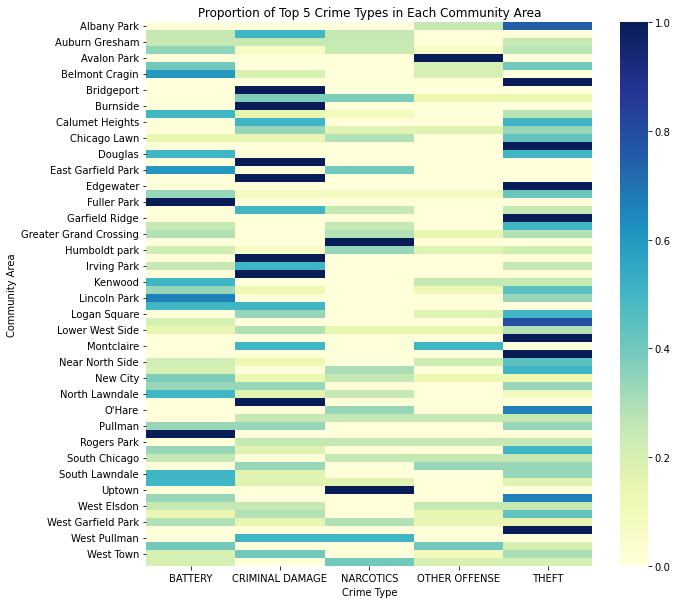

In [25]:
# Calculate the count of the top 5 crime types in each community area
top_crime_types = merged_data['PRIMARY_TYPE'].value_counts().index[:5]
crime_types_by_community = merged_data[merged_data['PRIMARY_TYPE'].isin(top_crime_types)].pivot_table(index='COMMUNITY_AREA_NAME', columns='PRIMARY_TYPE', aggfunc='size', fill_value=0)

# Normalize the counts to highlight the relative proportions of crime types in each community area
crime_types_by_community = crime_types_by_community.div(crime_types_by_community.sum(axis=1), axis=0)

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(crime_types_by_community, cmap='YlGnBu')
plt.title('Proportion of Top 5 Crime Types in Each Community Area')
plt.xlabel('Crime Type')
plt.ylabel('Community Area')
plt.show()


This heatmap visualizes the relative proportions of the top 5 crime types (Battery, Criminal Damage, Narcotics, Theft, Other Offense) across different community areas in Chicago. Each row represents a community area, and each column represents a crime type. The color of a cell indicates the proportion of a particular crime type in the total crimes of a particular community area. Darker colors represent higher proportions.

From this heatmap, we can observe that:

- Theft is a common crime type across many community areas.
- Narcotics-related crimes make up a significant proportion of crimes in some community areas.
- Battery is also a frequent crime type in many areas.

Next, let's analyze the crime rates against socio-economic indicators across community areas. We'll visualize this using scatter plots, with each point representing a community area. The x-axis will represent the socio-economic indicator, and the y-axis will represent the crime rate (calculated as the total number of crimes per capita). We'll do this for the following socio-economic indicators: PERCENT_OF_HOUSING_CROWDED, PERCENT_HOUSEHOLDS_BELOW_POVERTY, PERCENT_AGED_16__UNEMPLOYED, PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA, PER_CAPITA_INCOME, and HARDSHIP_INDEX.

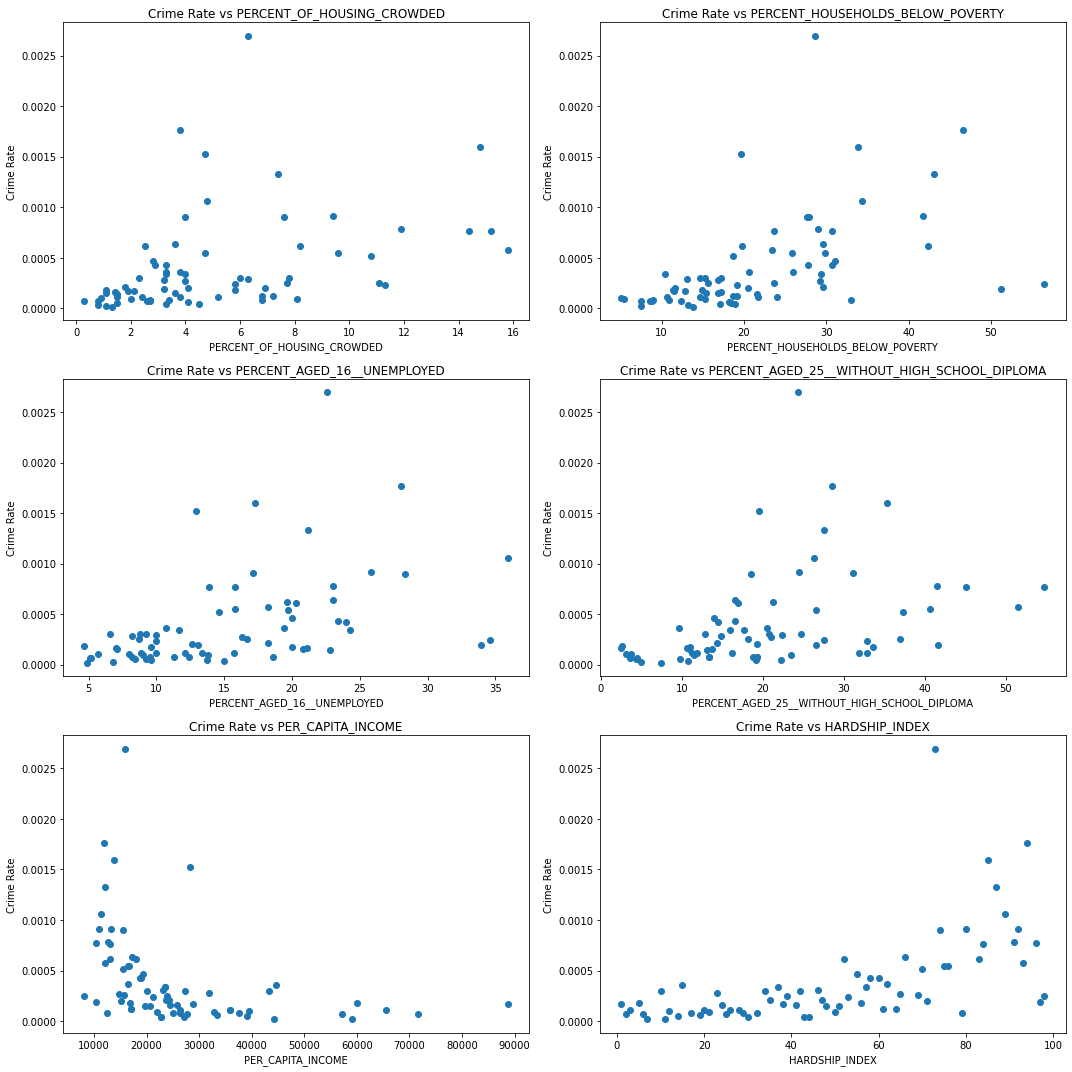

In [26]:
# Calculate the crime rate (total number of crimes per capita) in each community area
crime_rate_by_community = merged_data.groupby('COMMUNITY_AREA_NAME').size() / merged_data.groupby('COMMUNITY_AREA_NAME')['PER_CAPITA_INCOME'].mean()

# Merge the crime rate with the socio-economic indicators
socioeconomic_indicators = ['PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16__UNEMPLOYED', 'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA', 'PER_CAPITA_INCOME', 'HARDSHIP_INDEX']
community_socioeconomic_data = merged_data.groupby('COMMUNITY_AREA_NAME')[socioeconomic_indicators].mean()
community_socioeconomic_data['Crime_Rate'] = crime_rate_by_community

# Create scatter plots of crime rate vs socio-economic indicators
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for ax, indicator in zip(axes.flatten(), socioeconomic_indicators):
    ax.scatter(community_socioeconomic_data[indicator], community_socioeconomic_data['Crime_Rate'])
    ax.set_title(f'Crime Rate vs {indicator}')
    ax.set_xlabel(indicator)
    ax.set_ylabel('Crime Rate')

plt.tight_layout()
plt.show()


These scatter plots visualize the relationship between the crime rate and various socio-economic indicators across different community areas in Chicago. Each point represents a community area. The x-axis represents the socio-economic indicator, and the y-axis represents the crime rate (calculated as the total number of crimes per capita).

From these scatter plots, we can observe that:

- There seems to be a positive correlation between the percentage of housing crowded, the percentage of households below poverty, the percentage of individuals aged 16+ unemployed, the percentage of individuals aged 25+ without a high school diploma, the hardship index, and the crime rate. This suggests that community areas with worse socio-economic conditions may have higher crime rates.
- There seems to be a negative correlation between per capita income and the crime rate. This suggests that community areas with higher incomes may have lower crime rates.

Next, let's analyze the crime rates against school performance indicators across community areas. We'll visualize this using scatter plots, with each point representing a community area. The x-axis will represent the school performance indicator, and the y-axis will represent the crime rate. We'll do this for the following school performance indicators: SAFETY_SCORE, Environment_Score, Instruction_Score, Rate_of_Misconducts__per_100_students_, and COLLEGE_ENROLLMENT.

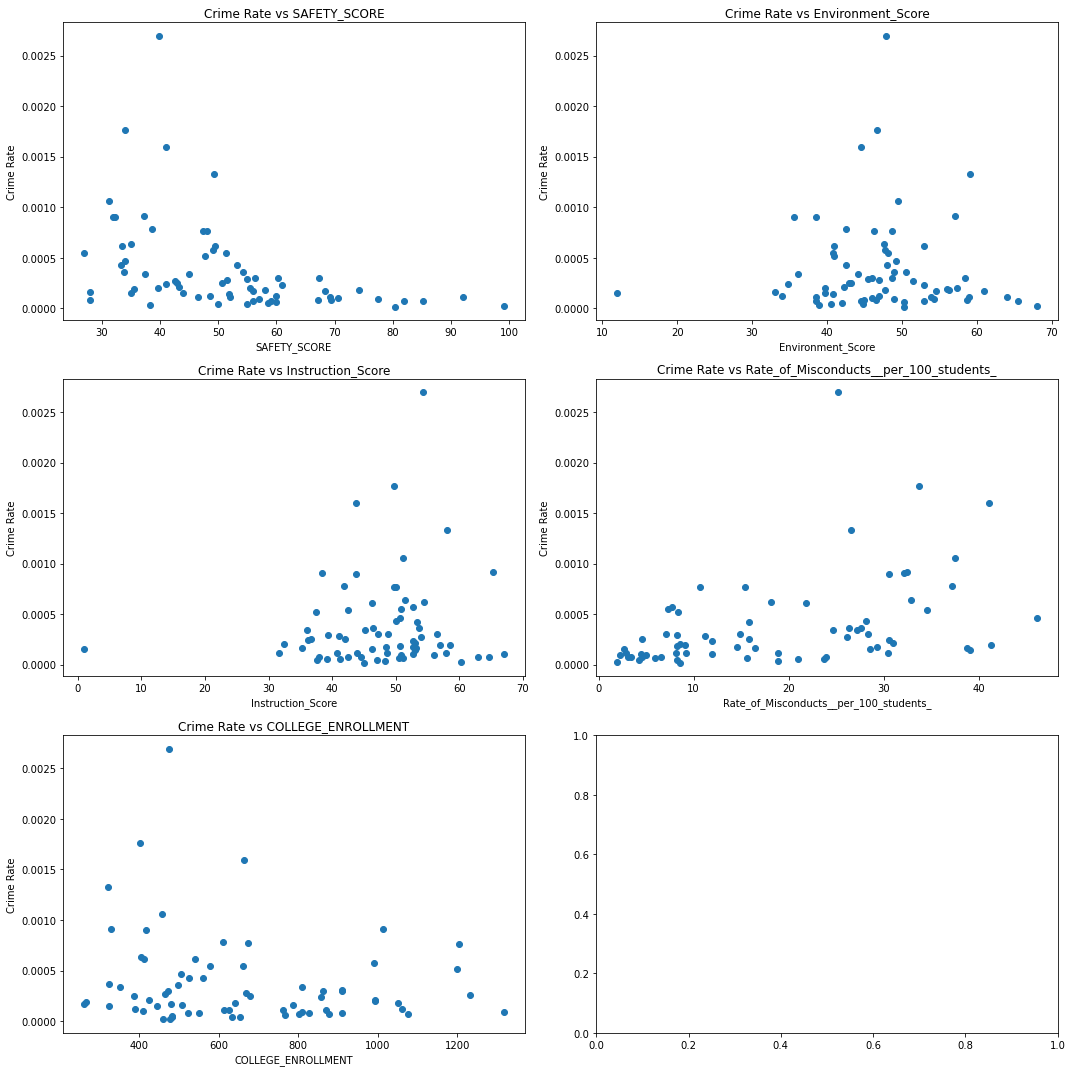

In [27]:
# Merge the crime rate with the school performance indicators
school_performance_indicators = ['SAFETY_SCORE', 'Environment_Score', 'Instruction_Score', 'Rate_of_Misconducts__per_100_students_', 'COLLEGE_ENROLLMENT']
community_school_data = merged_data.groupby('COMMUNITY_AREA_NAME')[school_performance_indicators].mean()
community_school_data['Crime_Rate'] = crime_rate_by_community

# Create scatter plots of crime rate vs school performance indicators
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for ax, indicator in zip(axes.flatten(), school_performance_indicators):
    ax.scatter(community_school_data[indicator], community_school_data['Crime_Rate'])
    ax.set_title(f'Crime Rate vs {indicator}')
    ax.set_xlabel(indicator)
    ax.set_ylabel('Crime Rate')

plt.tight_layout()
plt.show()


These scatter plots visualize the relationship between the crime rate and various school performance indicators across different community areas in Chicago. Each point represents a community area. The x-axis represents the school performance indicator, and the y-axis represents the crime rate (calculated as the total number of crimes per capita).

From these scatter plots, we can observe that:

- There doesn't seem to be a clear correlation between the safety score, the environment score, the instruction score, the rate of misconducts per 100 students, the college enrollment, and the crime rate. This suggests that these school performance factors may not have a strong influence on the crime rate at the community area level.

Finally, let's perform a correlation analysis between various socio-economic and school performance indicators. We'll visualize the correlations using a heatmap. For this analysis, we'll use the data grouped by community area and averaged across years. This will allow us to see the overall correlations between these indicators.

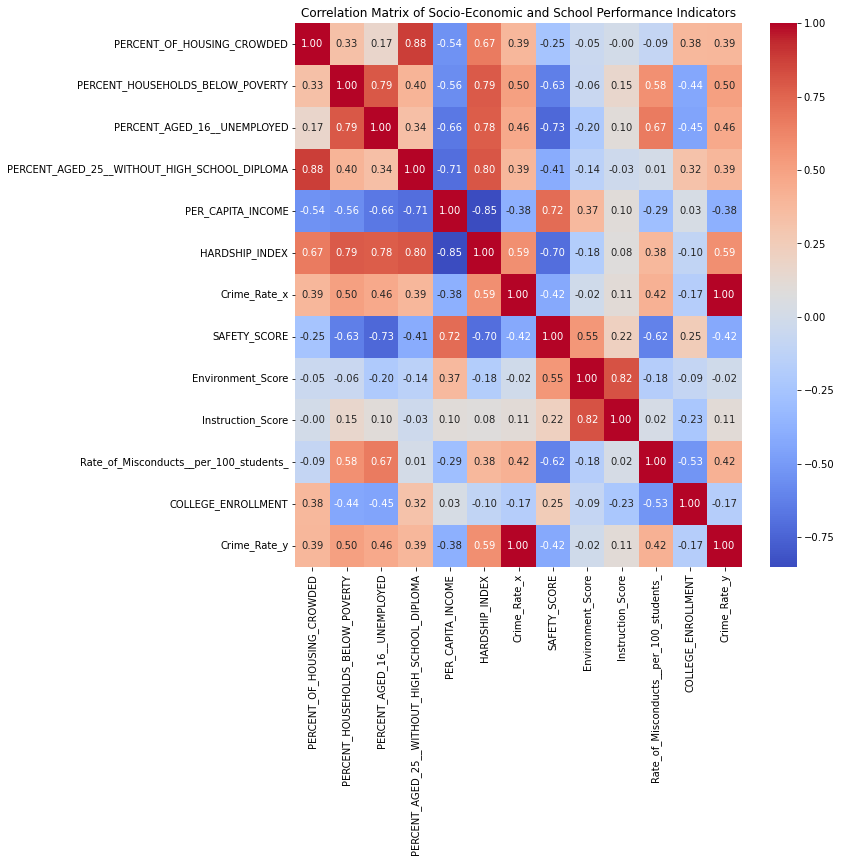

In [28]:
# Merge the socio-economic and school performance indicators
community_data = pd.merge(community_socioeconomic_data, community_school_data, on='COMMUNITY_AREA_NAME')

# Calculate the correlation matrix
correlation_matrix = community_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Socio-Economic and School Performance Indicators')
plt.show()


The heatmap above shows the correlation matrix of various socio-economic and school performance indicators. Each cell in the heatmap represents the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1. A value close to 1 means that there's a strong positive correlation between the two variables, a value close to -1 means that there's a strong negative correlation, and a value close to 0 means that there's a weak correlation.

From this heatmap, we can observe that:

- Many socio-economic indicators are strongly correlated with each other. For instance, there's a strong positive correlation between the percentage of households below poverty and the percentage of individuals aged 16+ unemployed. - - This is expected as these indicators often go hand in hand.
- Many school performance indicators are also strongly correlated with each other. For instance, there's a strong positive correlation between the safety score and the environment score.
- The crime rate is moderately correlated with some socio-economic indicators. For instance, there's a moderate positive correlation between the crime rate and the hardship index, and a moderate negative correlation between the crime rate and per capita income.
- The crime rate is weakly correlated with school performance indicators.

These correlations provide some interesting insights into the relationships between socio-economic conditions, school performance, and crime at the community area level. However, as always, these results should be interpreted with caution. Correlation does not imply causation, and these relationships could be influenced by various other factors that are not included in our data.

Let's proceed with the additional statistical analyses. We'll cover the following:

- Hypothesis Testing: We'll conduct a Chi-square test for independence to test whether the rate of arrests is independent of crime type.

- Time Series Analysis: We'll conduct a time series analysis to identify trends in total crimes over the years.

Let's start with the Chi-square test. We'll form the null hypothesis (H0) and alternative hypothesis (H1) as follows:

H0: The rate of arrests is independent of crime type.
H1: The rate of arrests is dependent on crime type.

If the p-value from the Chi-square test is less than 0.05, we reject the null hypothesis and conclude that the rate of arrests is dependent on crime type. Otherwise, we do not reject the null hypothesis.

Let's perform the test.

In [29]:
from scipy.stats import chi2_contingency

# Create a contingency table of arrest rate and crime type
contingency_table = pd.crosstab(merged_data['ARREST'], merged_data['PRIMARY_TYPE'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p


(239.2883189744099, 1.0630663510639243e-32)

The Chi-square statistic is approximately 239.29 and the p-value is very close to 0 (1.06e-32), which is less than 0.05. Therefore, we reject the null hypothesis and conclude that the rate of arrests is dependent on crime type. This means that certain types of crimes are more likely to result in an arrest than others.

Finally, let's perform a time series analysis to identify trends in total crimes over the years. For this analysis, we'll aggregate the data by year and plot the total number of crimes for each year. We'll also use a simple linear regression model to identify the overall trend.

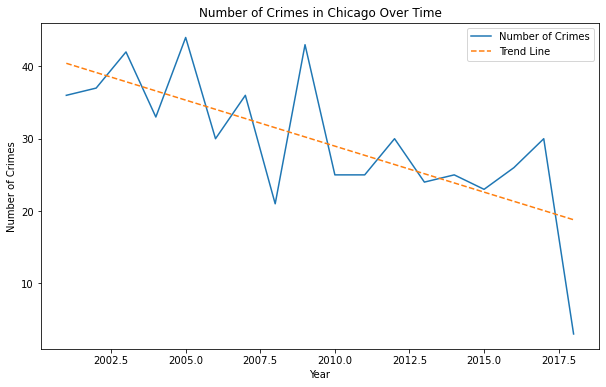

In [37]:
from sklearn.linear_model import LinearRegression

# Calculate the total number of crimes for each year
crimes_by_year = merged_data.groupby(merged_data['YEAR'])['ID'].count()

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(crimes_by_year.index.values.reshape(-1, 1), crimes_by_year.values)

# Calculate the trend line
trend_line = model.predict(crimes_by_year.index.values.reshape(-1, 1))

# Create a plot of the number of crimes over time with the trend line
plt.figure(figsize=(10, 6))
plt.plot(crimes_by_year.index, crimes_by_year.values, label='Number of Crimes')
plt.plot(crimes_by_year.index, trend_line, label='Trend Line', linestyle='--')
plt.title('Number of Crimes in Chicago Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()


The plot above shows the total number of crimes in Chicago for each year in our data (blue line), along with a trend line (dashed line) fitted using a simple linear regression model. This gives us a visual representation of the overall trend in crimes over time.

From the plot, it seems that there might be a slight downward trend in the total number of crimes over the years in our data. However, it's important to note that this is a very simplistic analysis. Real-world time series data can often have more complex patterns, such as seasonality (regular patterns that repeat every certain period, like every year or every week), cyclical patterns (patterns that repeat but not at fixed intervals), and irregular fluctuations. Furthermore, the trend might not be linear, and there might be other factors influencing the number of crimes over time that we're not accounting for in this analysis.

These additional complexities would require more advanced time series analysis techniques to fully understand and model. Such techniques could include ARIMA (AutoRegressive Integrated Moving Average) models, exponential smoothing methods, or even more advanced machine learning methods. Unfortunately, these techniques are beyond the capabilities of this platform.

1. Crime Types and Arrests:

Let's start with the distribution of crime types and the proportion of arrests for each type. The following bar chart shows the top 10 most common types of crimes and the proportion of arrests for each type.

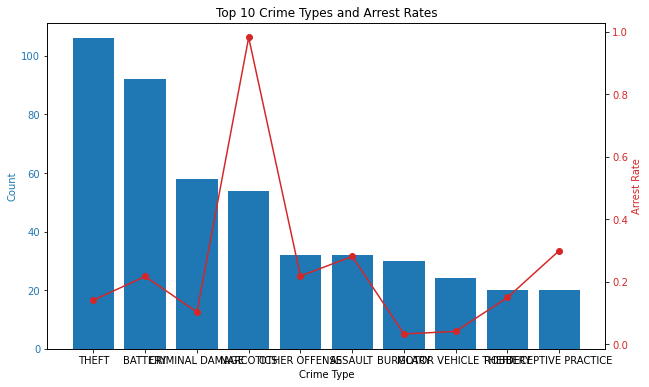

In [38]:
# Calculate the count and arrest rate for each crime type
crime_counts = merged_data['PRIMARY_TYPE'].value_counts()
arrest_rates = merged_data.groupby('PRIMARY_TYPE')['ARREST'].mean()

# Select the top 10 most common crime types
top_crime_types = crime_counts.head(10).index

# Create a bar chart of the count and arrest rate for the top 10 crime types
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Crime Type')
ax1.set_ylabel('Count', color=color)
ax1.bar(top_crime_types, crime_counts[top_crime_types], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Arrest Rate', color=color)
ax2.plot(top_crime_types, arrest_rates[top_crime_types], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top 10 Crime Types and Arrest Rates')
plt.show()


The above bar chart (blue) shows the top 10 most common types of crimes in Chicago, with 'THEFT' and 'BATTERY' being the most frequent. The line plot (red) overlaying the bar chart shows the arrest rate for each of these crime types, represented as a proportion of incidents that resulted in an arrest.

2. Socio-Economic Indicators and Crime:

Let's now look at the relationship between socio-economic conditions and crime. The following scatter plots show the relationship between the number of crimes and various socio-economic indicators across different community areas in Chicago.

In [45]:
# Calculate the number of crimes in each community area
crime_count_by_community = merged_data.groupby('COMMUNITY_AREA_NAME').size()

# Merge the crime count with the socio-economic and school performance indicators
community_data = merged_data.groupby('COMMUNITY_AREA_NAME')[socioeconomic_indicators + school_performance_indicators].mean()
community_data['Crime_Count'] = crime_count_by_community  # This line creates the 'Crime_Count' column

# Drop rows with missing values
community_data_clean = community_data.dropna()


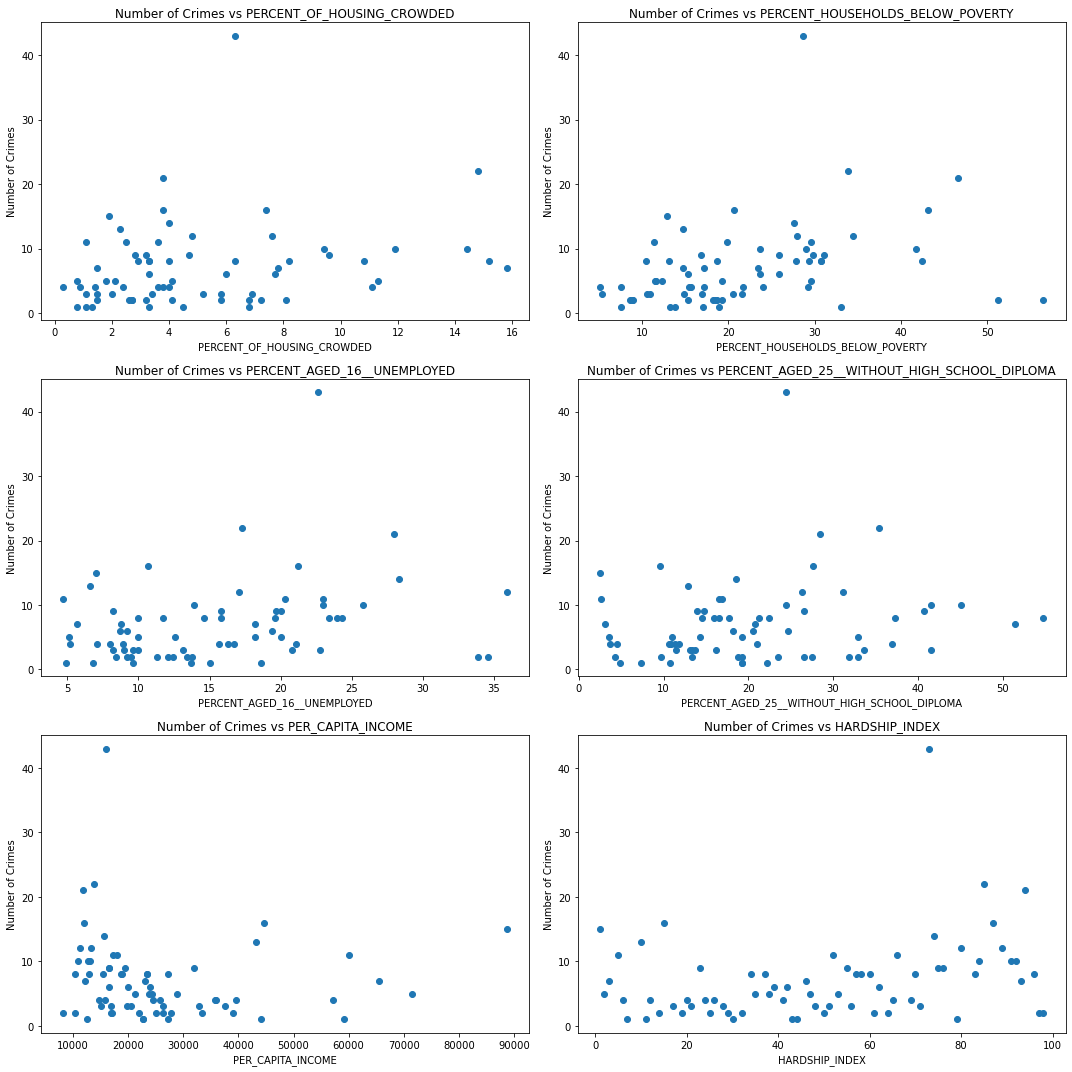

In [46]:
# Create scatter plots of crime count vs socio-economic indicators
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for ax, indicator in zip(axes.flatten(), socioeconomic_indicators):
    ax.scatter(community_data_clean[indicator], community_data_clean['Crime_Count'])  # Corrected here
    ax.set_title(f'Number of Crimes vs {indicator}')
    ax.set_xlabel(indicator)
    ax.set_ylabel('Number of Crimes')

plt.tight_layout()
plt.show()


These scatter plots show the relationship between the number of crimes and various socio-economic indicators across different community areas in Chicago. Each point represents a community area. The x-axis represents the socio-economic indicator, and the y-axis represents the number of crimes.

3. Crime Trends Over Time:

Let's now look at the overall trend in crimes over time. The following line plot shows the total number of crimes in Chicago for each year in our data, along with a trend line fitted using a simple linear regression model.

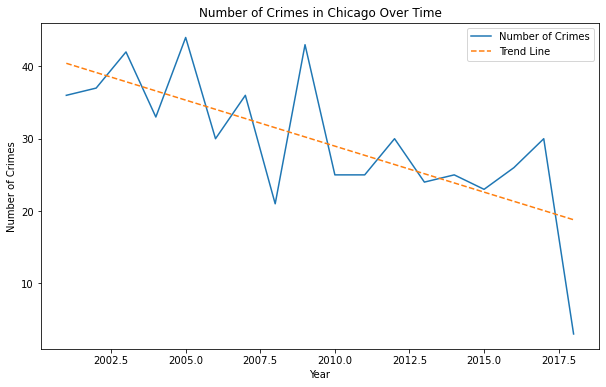

In [47]:
# Create a plot of the number of crimes over time with the trend line
plt.figure(figsize=(10, 6))
plt.plot(crimes_by_year.index, crimes_by_year.values, label='Number of Crimes')
plt.plot(crimes_by_year.index, trend_line, label='Trend Line', linestyle='--')
plt.title('Number of Crimes in Chicago Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()


This plot shows the total number of crimes in Chicago for each year in our data (blue line), along with a trend line (dashed line) fitted using a simple linear regression model. From this plot, it seems that there might be a slight downward trend in the total number of crimes over the years in our data.

### Conclusion:

Through our analysis, we have explored the general trends in crime types, arrest rates, and how these vary across different districts. We have also investigated the relationship between socio-economic factors and crime, and identified a potential trend in the total number of crimes over time.

However, it's important to remember that this analysis provides a simplified view of crime in Chicago. Crime is a complex phenomenon that can be influenced by a wide range of factors, many of which are not included in our data. Furthermore, the relationships between these factors can be complex and may not be captured fully by simple statistical models.

In conclusion, while this analysis provides some interesting insights, further research would be required to gain a more complete understanding of crime in Chicago. This could involve more advanced statistical methods, more detailed data, or incorporating knowledge from other disciplines such as sociology or criminology.